In [35]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import matplotlib.pyplot as plt
from scipy import ndimage
import numpy as np
import os
import sys


# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

/Users/timur/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log2
  from ipykernel import kernelapp as app


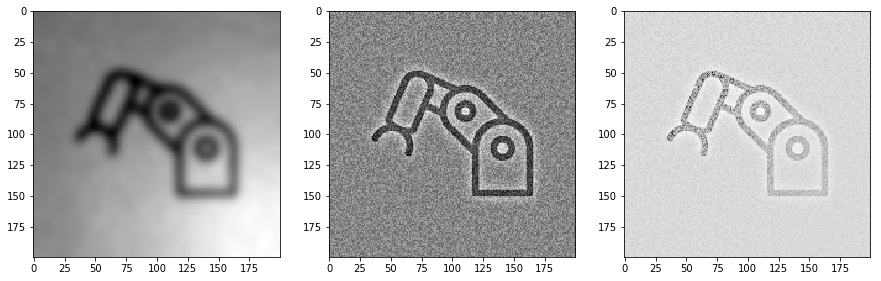

In [25]:
import matplotlib.pyplot as plt
import matplotlib.image as img
from scipy import ndimage as nimg 
import numpy as np
arms = img.imread('/Users/timur/Desktop/MV/lab10/lab10/data2/Arms/4.png')
gflt = nimg.gaussian_filter(arms, sigma = 4)
fig = plt.figure(figsize=(15, 10))
plt.subplot(131)
plt.imshow(gflt, cmap='gray')
plt.subplot(132)
plt.imshow(arms, cmap = 'gray')
plt.imshow((arms-gflt), cmap = 'gray')
maxValue = (arms - gflt).max()
minValue = (arms - gflt).min()
diff = np.log2(arms) - np.log2(gflt)
newImage = (diff-minValue)/(maxValue-minValue)


plt.subplot(133)
plt.imshow(newImage, cmap='gray')
plt.show()

/Users/timur/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log2
  from ipykernel import kernelapp as app


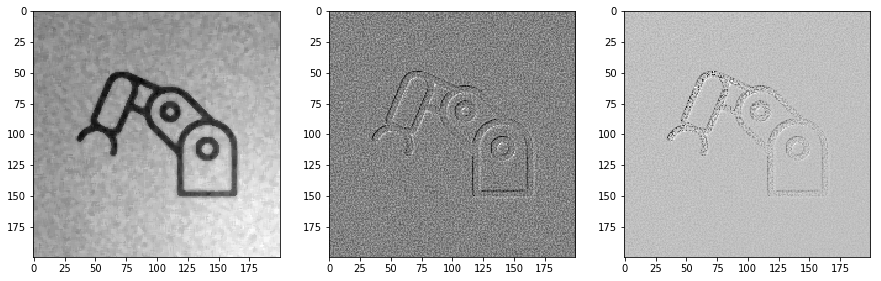

In [26]:
import matplotlib.pyplot as plt
import matplotlib.image as img
from scipy import ndimage as nimg 
import numpy as np
arms = img.imread('/Users/timur/Desktop/MV/lab10/lab10/data2/Arms/4.png')
gflt = nimg.median_filter(arms, 4)
fig = plt.figure(figsize=(15, 10))
plt.subplot(131)
plt.imshow(gflt, cmap='gray')
plt.subplot(132)
plt.imshow(arms, cmap = 'gray')
plt.imshow((arms-gflt), cmap = 'gray')
maxValue = (arms - gflt).max()
minValue = (arms - gflt).min()
diff = np.log2(arms) - np.log2(gflt)
newImage = (diff-minValue)/(maxValue-minValue)


plt.subplot(133)
plt.imshow(newImage, cmap='gray')
plt.show()

In [33]:
#!/usr/bin/python
from PIL import Image
import os, sys

path = "/Users/timur/Downloads/Head/"
dirs = os.listdir(path)

def resize():
    for item in dirs:
        if os.path.isfile(path+item):
            im = Image.open(path+item)
            f, e = os.path.splitext(path+item)
            imResize = im.resize((28,28), Image.ANTIALIAS)
            imResize.save(f + ' resized.png', 'PNG', quality=90)

resize()

In [30]:
## Required Modules
from PIL import Image
import glob
import os

## Global Variables
FILETYPES = ['*.png']
NEWIMAGESIZE = 28

## Functions
def convert2jpg():
    for types in FILETYPES:
        openFiles = glob.glob(types)
        
        for files in openFiles:
            inFile = Image.open(files) 
            fileName = os.path.splitext(files)[0] # gets filename
            outFile = fileName + ".jpg" 
            inFile.save(outFile)
            print (fileName + " ... converted")
            
    print ("\n")
    return None

def delOldFileTypes():
    for types in FILETYPES:
        openFiles = glob.glob(types)
        
        for files in openFiles:
            os.remove(files)
            print (files + " ... deleted")
            
    print ("\n")
    return None
    

def resize(): 
    openFiles = glob.glob('*.jpg')
    
    for files in openFiles:
        inFile = Image.open(files)
        fileName = os.path.splitext(files)[0] # gets filename
        outFile = fileName + "new.jpg"
        print (fileName)
        print ("Original size ",inFile.size)
        xDim = inFile.size[0]
        yDim = inFile.size[1]        
        newSize = aspectRatio(xDim, yDim)       
        inFile = inFile.resize((int(newSize[0]),int(newSize[1])),Image.ANTIALIAS)
        inFile.save(outFile)
        print ("New Size ",inFile.size, "\n")
        
    return None

def aspectRatio(xDim, yDim):
    
    if xDim <= NEWIMAGESIZE and yDim <= NEWIMAGESIZE: #ensures images already correct size are not enlarged.
        return(xDim, yDim)
    
    elif xDim > yDim:
        divider = xDim/float(NEWIMAGESIZE)
        xDim = float(xDim/divider)
        yDim = float(yDim/divider)
        return(xDim, yDim)
        
    elif yDim > xDim:
        divider = yDim/float(NEWIMAGESIZE)
        xDim = float(xDim/divider)
        yDim = float(yDim/divider)
        return(xDim, yDim)
       
    elif xDim == yDim:
        xDim = NEWIMAGESIZE
        yDim = NEWIMAGESIZE
        return(xDim, yDim)

convert2jpg()
delOldFileTypes()
resize()


print ('All Done!!!')
raw_input('Images Resized... Press any key to continue')

127 ... converted
4 ... converted


127.png ... deleted
4.png ... deleted


127
Original size  (200, 200)
New Size  (28, 28) 

4
Original size  (200, 200)
New Size  (28, 28) 

All Done!!!


NameError: name 'raw_input' is not defined

In [37]:
image_size = 28  # Pixel width and height.
pixel_depth = 255.0  # Number of levels per pixel.
folders = [
    r'data2//Arms//',
    r'data2//Figure_normal_legs//',
    r'data2//FigureWheels//',
    r'data2//Head//',

]

def load_letter(folder, min_num_images):
  """Load the data for a single letter label."""
  image_files = os.listdir(folder)
  dataset = np.ndarray(shape=(len(image_files), image_size, image_size),
                         dtype=np.float32)
  print(folder)
  num_images = 0
  for image in image_files:
    image_file = os.path.join(folder, image)
    try:
      image_data = (ndimage.imread(image_file).astype(float) - 
                    pixel_depth / 2) / pixel_depth
      if image_data.shape != (image_size, image_size):
        raise Exception('Unexpected image shape: %s' % str(image_data.shape))
      dataset[num_images, :, :] = image_data
      num_images = num_images + 1
    except IOError as e:
      print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
    
  dataset = dataset[0:num_images, :, :]
  if num_images < min_num_images:
    raise Exception('Many fewer images than expected: %d < %d' %
                    (num_images, min_num_images))
    
  print('Full dataset tensor:', dataset.shape)
  print('Mean:', np.mean(dataset))
  print('Standard deviation:', np.std(dataset))
  return dataset

X_datasets = list()
Y_datasets = list()
for idx in range(len(folders)):
    folder = folders[idx] 
    X_datasets.append(load_letter(folder, 222))
    labels = np.zeros((X_datasets[-1].shape[0],len(folders)))
    labels[:,idx] = 1
    Y_datasets.append(labels)
    

data2//Arms//
Could not read: data2//Arms//.DS_Store : cannot identify image file 'data2//Arms//.DS_Store' - it's ok, skipping.
Full dataset tensor: (784, 28, 28)
Mean: 0.112809
Standard deviation: 0.143145
data2//Figure_normal_legs//
Could not read: data2//Figure_normal_legs//.DS_Store : cannot identify image file 'data2//Figure_normal_legs//.DS_Store' - it's ok, skipping.
Full dataset tensor: (622, 28, 28)
Mean: 0.0883994
Standard deviation: 0.16318
data2//FigureWheels//
Could not read: data2//FigureWheels//.DS_Store : cannot identify image file 'data2//FigureWheels//.DS_Store' - it's ok, skipping.
Full dataset tensor: (222, 28, 28)
Mean: 0.075104
Standard deviation: 0.165659
data2//Head//
Could not read: data2//Head//.DS_Store : cannot identify image file 'data2//Head//.DS_Store' - it's ok, skipping.
Full dataset tensor: (473, 28, 28)
Mean: 0.0372736
Standard deviation: 0.201234


Total samples number: (2101, 28, 28)
Samples for tests: 526
Samples for trains: 1575


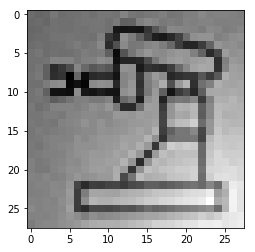

In [38]:
from sklearn.model_selection import train_test_split

X_datasets2 = np.concatenate(X_datasets)
Y_datasets2 = np.concatenate(Y_datasets)
print("Total samples number:",X_datasets2.shape)
X_trains,X_tests,Y_trains,Y_tests = train_test_split(X_datasets2,Y_datasets2,test_size=0.25)
print("Samples for tests:",Y_tests.shape[0])
print("Samples for trains:",Y_trains.shape[0])
plt.imshow(X_tests[0],cmap='gray')

In [39]:
# Create first network with Keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Reshape
from keras.callbacks import EarlyStopping,ModelCheckpoint
import numpy

callbacks = [
    EarlyStopping(monitor='val_loss', min_delta=0.00001, verbose=1),
    # EarlyStopping(monitor='val_loss', patience=2, verbose=0),
    ModelCheckpoint(filepath='./weights.net', verbose=1, save_best_only=True),
    
]

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

input_dim = X_trains[0].shape[0]*X_trains[0].shape[1]
print((X_trains[0].shape[0],X_trains[0].shape[1]))
print(Y_trains[0].shape[0])
# create model
model = Sequential()
model.add(Reshape((input_dim,), input_shape=(X_trains[0].shape[0],X_trains[0].shape[1])))
model.add(Dense(input_dim, input_shape = (input_dim,), init='uniform', activation='relu'))
model.add(Dense(int(input_dim/2), init='uniform', activation='relu'))
model.add(Dense(int(input_dim/4), init='uniform', activation='relu'))
model.add(Dense(int(input_dim/8), init='uniform', activation='relu'))
model.add(Dense(int(input_dim/16), init='uniform', activation='relu'))
model.add(Dense(Y_trains[0].shape[0],init='uniform', name="output"))
model.add(Activation('sigmoid', name="sigmoid"))
model.summary()

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_trains, 
          Y_trains, 
          epochs=50, 
          batch_size=10, 
          verbose=2, 
          validation_split=0.25,
          callbacks=callbacks)
# calculate predictions
results = model.evaluate(X_tests, Y_tests, batch_size=32, verbose=1, sample_weight=None)
# round predictions
print(results)

Using TensorFlow backend.
/Users/timur/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


(28, 28)
4
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 392)               307720    
_________________________________________________________________
dense_3 (Dense)              (None, 196)               77028     
_________________________________________________________________
dense_4 (Dense)              (None, 98)                19306     
_________________________________________________________________
dense_5 (Dense)              (None, 49)                4851      
_________________________________________________________________
output (Dense)               (None, 4)                 200       

/Users/timur/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(784, input_shape=(784,), activation="relu", kernel_initializer="uniform")`
/Users/timur/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(392, activation="relu", kernel_initializer="uniform")`
/Users/timur/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(196, activation="relu", kernel_initializer="uniform")`
/Users/timur/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(98, activation="relu", kernel_initializer="uniform")`
/Users/timur/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(49, activation="relu", kernel_initializer="uniform"

Train on 1181 samples, validate on 394 samples
Epoch 1/50
Epoch 00001: val_loss improved from inf to 0.37081, saving model to ./weights.net
 - 3s - loss: 0.4839 - acc: 0.7786 - val_loss: 0.3708 - val_acc: 0.8369
Epoch 2/50
Epoch 00002: val_loss improved from 0.37081 to 0.36176, saving model to ./weights.net
 - 2s - loss: 0.3138 - acc: 0.8601 - val_loss: 0.3618 - val_acc: 0.8820
Epoch 3/50
Epoch 00003: val_loss improved from 0.36176 to 0.25154, saving model to ./weights.net
 - 2s - loss: 0.2350 - acc: 0.8986 - val_loss: 0.2515 - val_acc: 0.8909
Epoch 4/50
Epoch 00004: val_loss improved from 0.25154 to 0.23787, saving model to ./weights.net
 - 2s - loss: 0.1916 - acc: 0.9143 - val_loss: 0.2379 - val_acc: 0.8978
Epoch 5/50
Epoch 00005: val_loss did not improve
 - 2s - loss: 0.1733 - acc: 0.9232 - val_loss: 0.2686 - val_acc: 0.8978
Epoch 00005: early stopping
526/526 [==============================] - 0s 189us/step
[0.28914648509750801, 0.8954372625840481]


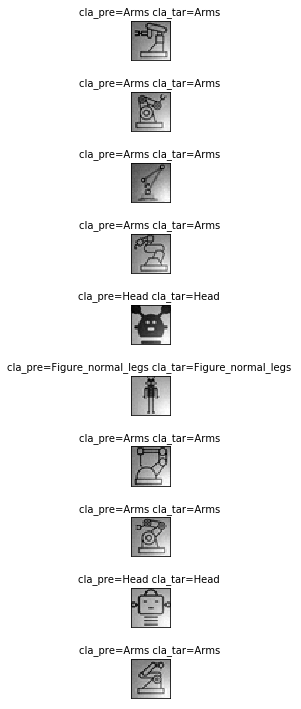

In [40]:
clazzez = ['Arms','Figure_normal_legs','FigureWheels','Head']
results = model.predict(X_tests)
errors = list()
for idx in range(len(results)):
    res = results[idx]
    cla_pre = clazzez[np.argmax(res)]
    cla_tar = clazzez[np.argmax(Y_tests[idx])]
    if cla_pre==cla_tar:
#         print(cla_pre,cla_tar)
        errors.append(idx)
# print(errors)

problems = 10
fig, axes = plt.subplots(problems, figsize=(10,10))
fig.tight_layout()
for idx in range(problems):
    err = errors[idx]
    cla_pre = clazzez[np.argmax(results[err])]
    cla_tar = clazzez[np.argmax(Y_tests[err])]    
    
    axes[idx].imshow(X_tests[err],cmap='gray')
    axes[idx].set_title("cla_pre=%s cla_tar=%s " % (cla_pre,cla_tar), fontsize=10)
    axes[idx].set_xticks([]) 
    axes[idx].set_yticks([]) 
